# Different Stores Sales EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# link to data set. Change directory to pc path
df = pd.read_csv("https://www.kaggle.com/datasets/kzmontage/sales-from-different-stores/data")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,invoice_date,invoice_time
0,I138884,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,2016-10-30,09:58:00
1,I317333,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,2016-10-30,09:58:00
2,I127801,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,2016-10-30,09:58:00
3,I173702,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,2016-10-30,09:58:00
4,I337046,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,2016-10-30,09:59:00


In [4]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y-%m-%d')
df['invoice_time'] = pd.to_datetime(df['invoice_time'], format='%H:%M:%S').dt.time

In [5]:
total_profit = df['profit'] = (df['selling_price_per_unit'] - df['cost_price_per_unit']) * df['quantity']
total_profit

0         375.100
1         540.153
2           5.020
3         500.425
4          60.600
           ...   
99452      73.310
99453       6.276
99454       6.276
99455    1680.000
99456      31.671
Length: 99457, dtype: float64

# Total sales by region

In [7]:
total_sales_by_region = df.groupby('region')['selling_price_per_unit'].sum().reset_index()
total_sales_by_region = total_sales_by_region.sort_values(by='selling_price_per_unit', ascending=False).reset_index(drop=True)
total_sales_by_region

,region,selling_price_per_unit
0,West,21733560.38
1,East,19728186.37
2,Central,15997848.96
3,South,11091770.20


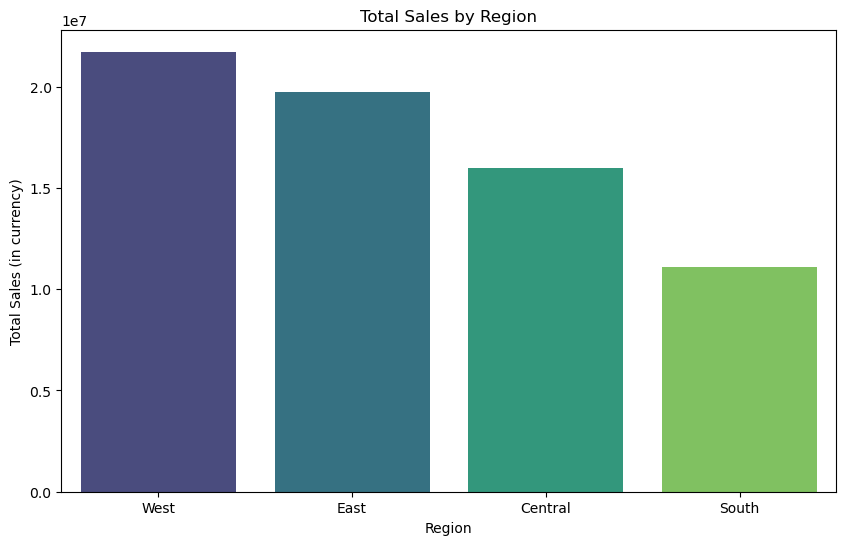

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='selling_price_per_unit', hue='region', legend=False, data=total_sales_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in currency)')
plt.show()

# Profit Analysis by Product Category

In [10]:
total_profit_by_category = df.groupby('category')['profit'].sum().reset_index()
total_profit_by_category = total_profit_by_category.sort_values(by='profit', ascending=False).reset_index(drop=True)
total_profit_by_category

,category,profit
0,Clothing,1.151065e+07
1,Technology,6.268658e+06
2,Shoes,5.858519e+06
3,Cosmetics,1.475541e+06
4,Toys,8.647816e+05
5,Food & Beverage,2.232361e+05
6,Books,2.192373e+05
7,Souvenir,1.674677e+05


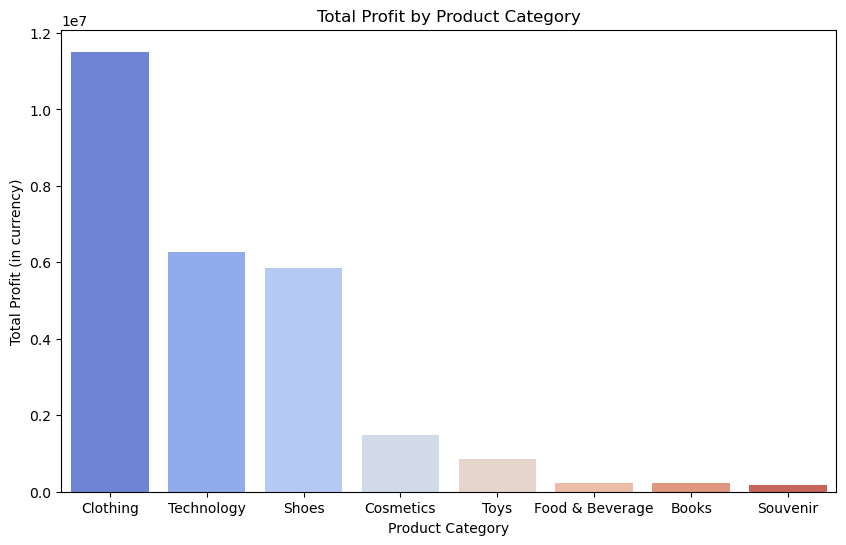

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='profit', data=total_profit_by_category, hue='category', legend=False, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit (in currency)')
plt.show()

# Top Selling Products by Quantity

In [13]:
top_products_by_quantity = df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()
top_products_by_quantity

,category,quantity
0,Clothing,103598
1,Cosmetics,45501
2,Food & Beverage,44281
3,Toys,30321
4,Shoes,30217


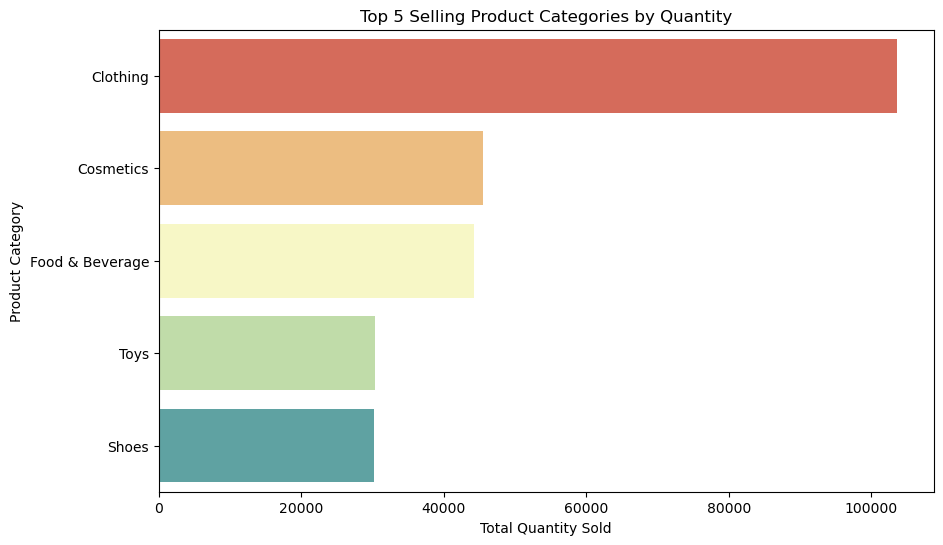

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='category', hue='category', legend=False, data=top_products_by_quantity, palette='Spectral')
plt.title('Top 5 Selling Product Categories by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

# Calculate average spend per customer by gender

In [16]:
average_spend_by_gender = df.groupby('gender')['selling_price_per_unit'].mean().reset_index()
average_spend_by_gender

,gender,selling_price_per_unit
0,Female,688.137615
1,Male,690.920933


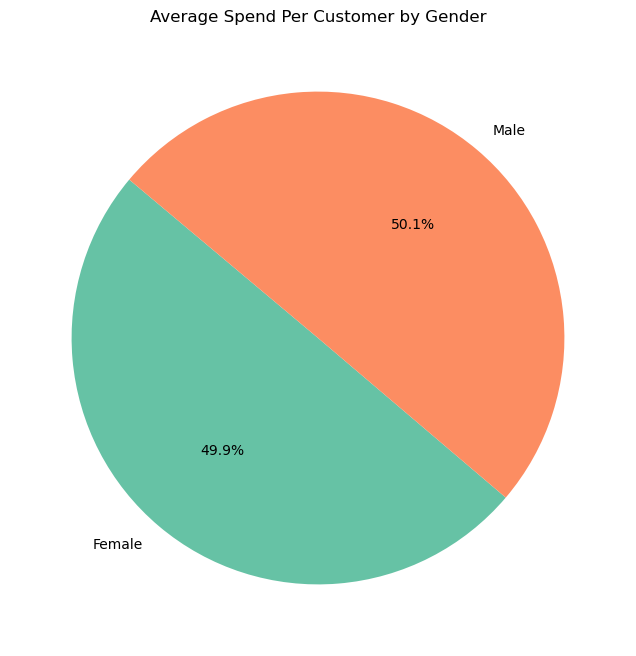

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(
    average_spend_by_gender['selling_price_per_unit'], 
    labels=average_spend_by_gender['gender'], 
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2'),
    startangle=140
)
plt.title('Average Spend Per Customer by Gender')
plt.show()

# Sales Contribution by Gender

In [19]:
sales_by_gender = df.groupby('gender')['selling_price_per_unit'].sum().reset_index()
sales_by_gender

,gender,selling_price_per_unit
0,Female,40931801.62
1,Male,27619564.29


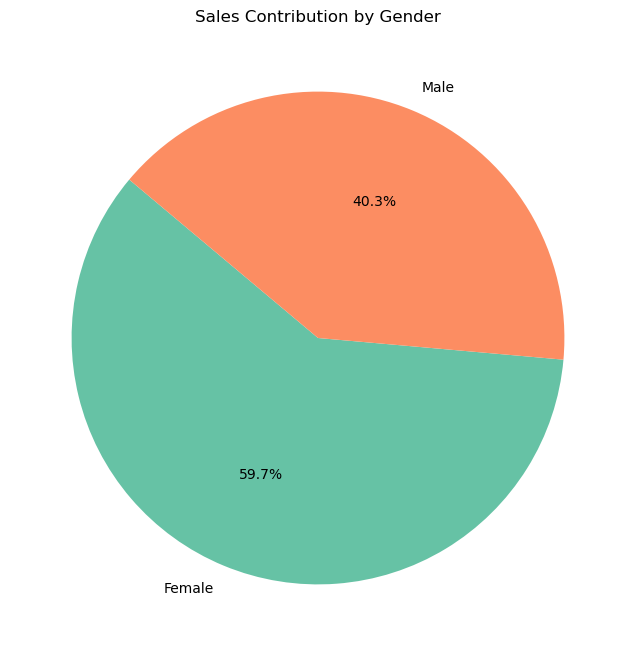

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_gender['selling_price_per_unit'], 
    labels=sales_by_gender['gender'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('Set2')
)
plt.title('Sales Contribution by Gender')
plt.show()

# Calculate daily sales

In [22]:
daily_sales = df.groupby('invoice_date')['selling_price_per_unit'].sum().reset_index()
daily_sales

,invoice_date,selling_price_per_unit
0,2016-10-30,2529013.88
1,2016-10-31,4311327.97
2,2016-11-01,4143269.41
3,2016-11-02,4191174.03
4,2016-11-03,4222830.92
5,2016-11-04,4210573.89
6,2016-11-05,4326522.83
7,2016-11-06,4349837.15
8,2016-11-07,4114120.22
9,2016-11-08,4255340.43


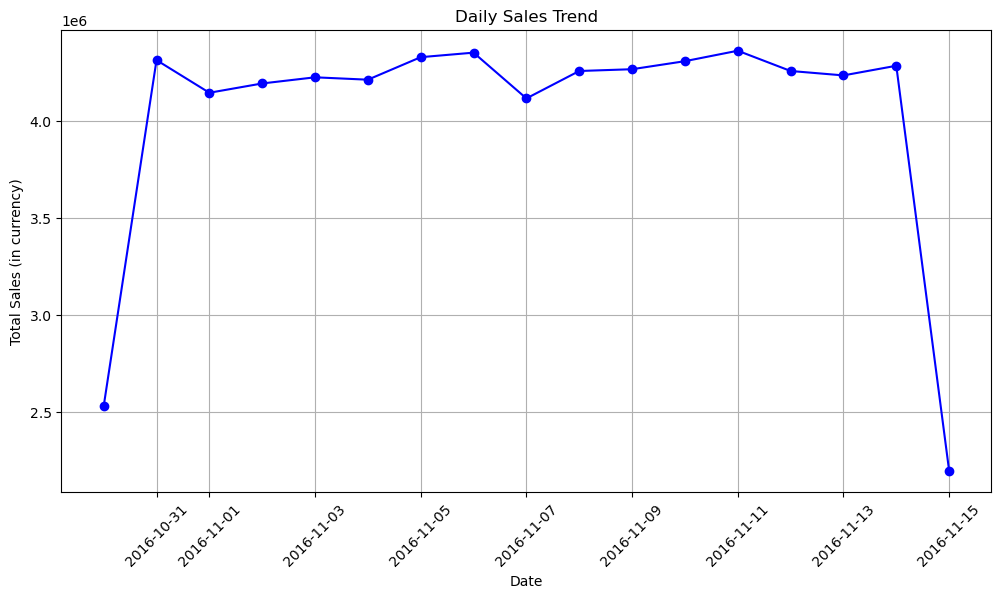

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['invoice_date'], daily_sales['selling_price_per_unit'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (in currency)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Peak shopping hours

In [25]:
df['invoice_hour'] = pd.to_datetime(df['invoice_time'], format='%H:%M:%S').dt.hour
sales_by_hour = df.groupby('invoice_hour')['selling_price_per_unit'].sum().reset_index()
sales_by_hour

,invoice_hour,selling_price_per_unit
0,0,2816465.48
1,1,2793682.62
2,2,2838424.98
3,3,2877903.81
4,4,2849859.94
5,5,2923939.80
6,6,2892793.13
7,7,2807085.07
8,8,2759392.61
9,9,2885005.31


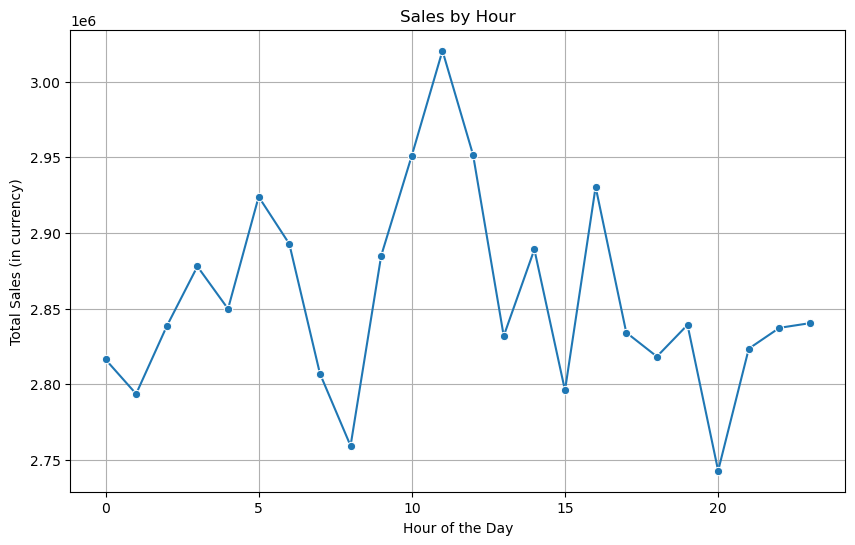

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='invoice_hour', y='selling_price_per_unit', data=sales_by_hour, marker='o')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (in currency)')
plt.grid(True)
plt.show()


# Most popular product categories by gender

In [28]:
quantity_by_category_gender = df.groupby(['category', 'gender'])['quantity'].sum().unstack().reset_index()
quantity_by_category_gender

gender,category,Female,Male
0,Books,8783,6206
1,Clothing,62062,41536
2,Cosmetics,27277,18224
3,Food & Beverage,26362,17919
4,Shoes,17906,12311
5,Souvenir,8976,5895
6,Technology,8977,6056
7,Toys,18362,11959


<Figure size 1000x600 with 0 Axes>

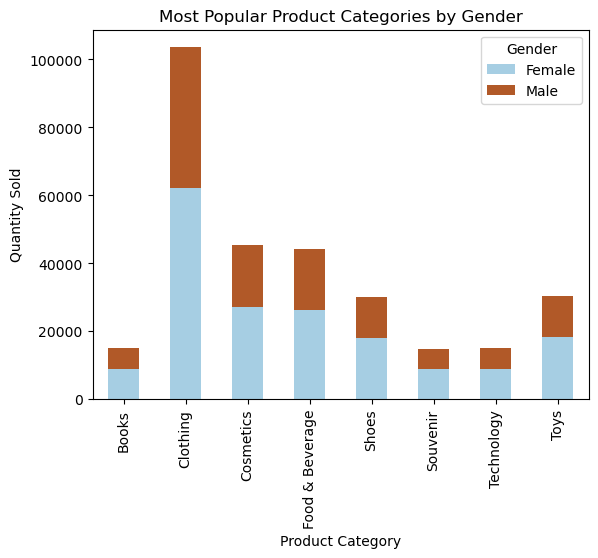

In [29]:
plt.figure(figsize=(10, 6))
quantity_by_category_gender.plot(x='category', kind='bar', stacked=True, colormap='Paired')
plt.title('Most Popular Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.legend(title='Gender')
plt.show()

# Payment Method Preference

In [31]:
payment_method_counts = df['payment_method'].value_counts().reset_index()
payment_method_counts

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


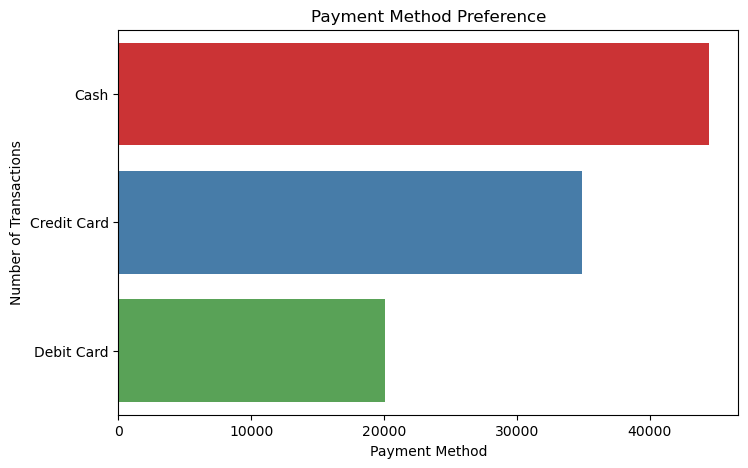

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x='count', y='payment_method', hue='payment_method', legend=False, data=payment_method_counts, palette='Set1')
plt.title('Payment Method Preference')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

# Profit Margin by Product Category

In [34]:
df['profit_margin'] = (df['profit'] / (df['cost_price_per_unit'] * df['quantity'])) * 100
profit_margin_by_category = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False).reset_index()
profit_margin_by_category

,category,profit_margin
0,Souvenir,39.200733
1,Food & Beverage,39.065727
2,Books,39.040921
3,Cosmetics,33.735447
4,Toys,33.724363
5,Clothing,22.104394
6,Shoes,14.237231
7,Technology,12.431121


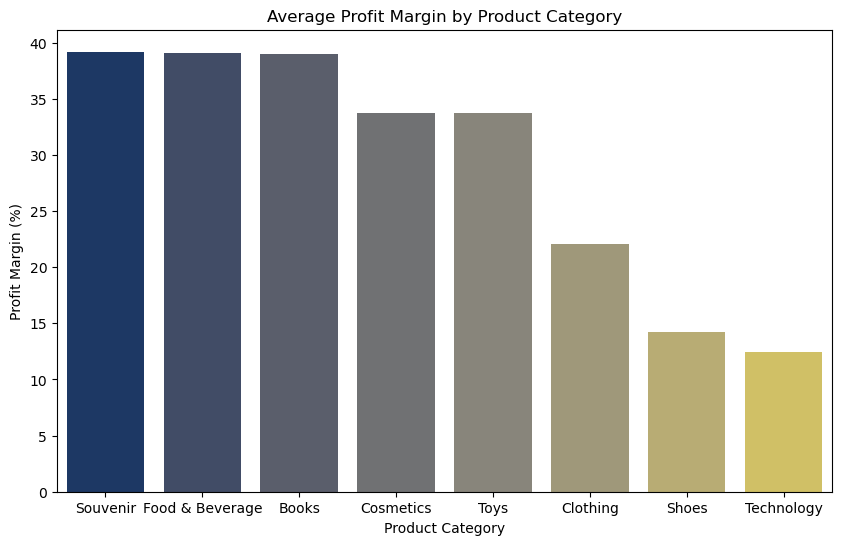

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='profit_margin', hue='category', legend=False, data=profit_margin_by_category, palette='cividis')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.show()

# Customer Age Distribution

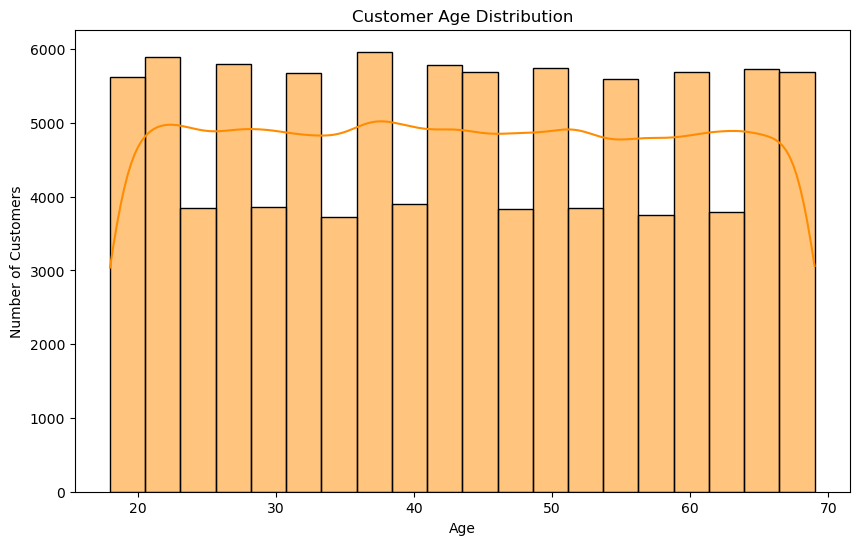

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='darkorange')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Sales by State

In [39]:
total_sales_by_state = df.groupby('state')['selling_price_per_unit'].sum().sort_values(ascending=False).reset_index()
total_sales_by_state

,state,selling_price_per_unit
0,California,13088362.01
1,New York,8008417.68
2,Texas,6808171.05
3,Pennsylvania,4113482.19
4,Illinois,3431141.85
5,Washington,3427124.74
6,Ohio,3131549.37
7,Iowa,3061924.93
8,Delaware,2601148.24
9,Florida,2585157.63


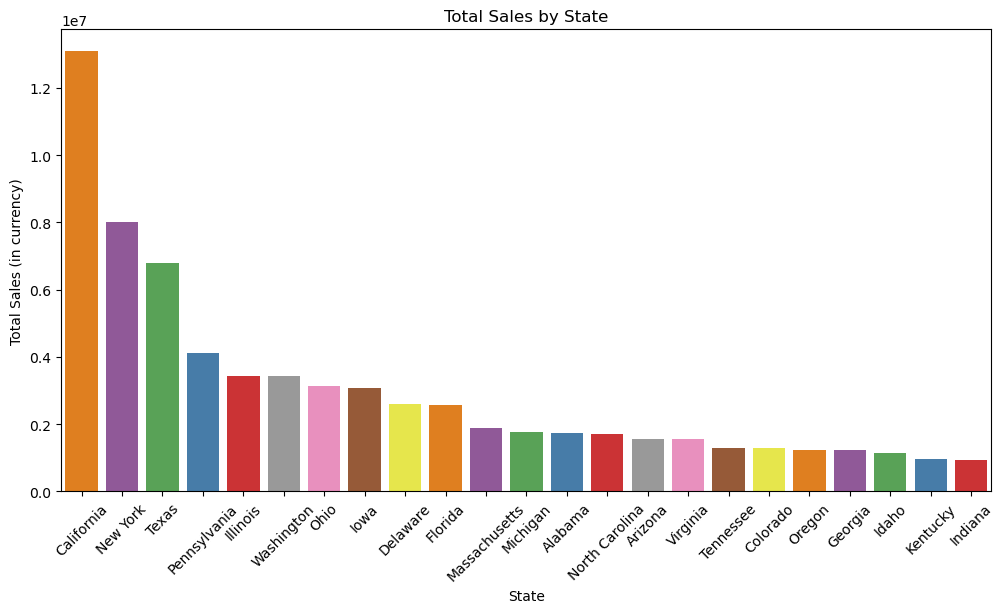

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='selling_price_per_unit', hue='selling_price_per_unit', legend=False, data=total_sales_by_state, palette='Set1')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales (in currency)')
plt.xticks(rotation=45)
plt.show()

# Gender Distribution in Shopping Malls

In [42]:
gender_distribution_malls = df.groupby(['shopping_mall', 'gender']).size().unstack().reset_index()
gender_distribution_malls

gender,shopping_mall,Female,Male
0,Istinye Park,8814,5958
1,Kanyon,11906,7917
2,Mall of Istanbul,11513,7795
3,Metrocity,8941,6070
4,Metropol AVM,6144,4017
5,Viaport Outlet,6174,4034
6,Zorlu Center,5990,4184


<Figure size 1200x600 with 0 Axes>

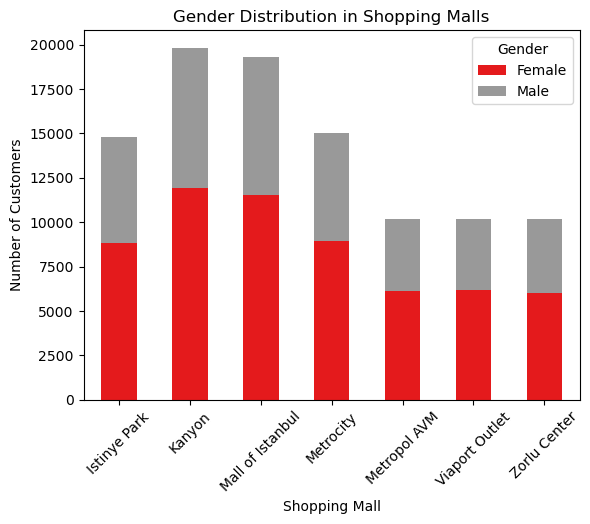

In [43]:
plt.figure(figsize=(12, 6))
gender_distribution_malls.plot(x='shopping_mall', kind='bar', stacked=True, colormap='Set1')
plt.title('Gender Distribution in Shopping Malls')
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# High-Profit Transactions

In [45]:
top_profit_transactions = df.sort_values(by='profit', ascending=False).head(10)
top_profit_transactions

,invoice_no,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,invoice_date,invoice_time,profit,invoice_hour,profit_margin
100,I283443,C189493,Male,43,Technology,15,3150.0,2677.5,Credit Card,Central,Illinois,Viaport Outlet,2016-10-30,10:21:00,7087.5,10,17.647059
81594,I102703,C110600,Female,40,Technology,5,5250.0,4725.0,Credit Card,Central,Texas,Mall of Istanbul,2016-11-12,15:16:00,2625.0,15,11.111111
24615,I235578,C191360,Male,21,Technology,5,5250.0,4725.0,Credit Card,East,Ohio,Metropol AVM,2016-11-03,09:41:00,2625.0,9,11.111111
61476,I540388,C292989,Female,58,Technology,5,5250.0,4725.0,Debit Card,South,North Carolina,Istinye Park,2016-11-09,09:02:00,2625.0,9,11.111111
68229,I260755,C219246,Male,59,Technology,5,5250.0,4725.0,Cash,Central,Texas,Metropol AVM,2016-11-10,11:18:00,2625.0,11,11.111111
7792,I338099,C106117,Female,58,Technology,5,5250.0,4725.0,Cash,Central,Texas,Viaport Outlet,2016-10-31,16:16:00,2625.0,16,11.111111
7791,I668520,C908608,Female,35,Technology,5,5250.0,4725.0,Debit Card,Central,Illinois,Kanyon,2016-10-31,16:16:00,2625.0,16,11.111111
63184,I171712,C223731,Female,65,Technology,5,5250.0,4725.0,Credit Card,Central,Illinois,Metrocity,2016-11-09,15:41:00,2625.0,15,11.111111
43979,I256734,C585144,Female,24,Technology,5,5250.0,4725.0,Debit Card,East,New York,Metrocity,2016-11-06,12:59:00,2625.0,12,11.111111
2873,I883022,C186458,Female,68,Technology,5,5250.0,4725.0,Credit Card,West,California,Istinye Park,2016-10-30,21:08:00,2625.0,21,11.111111


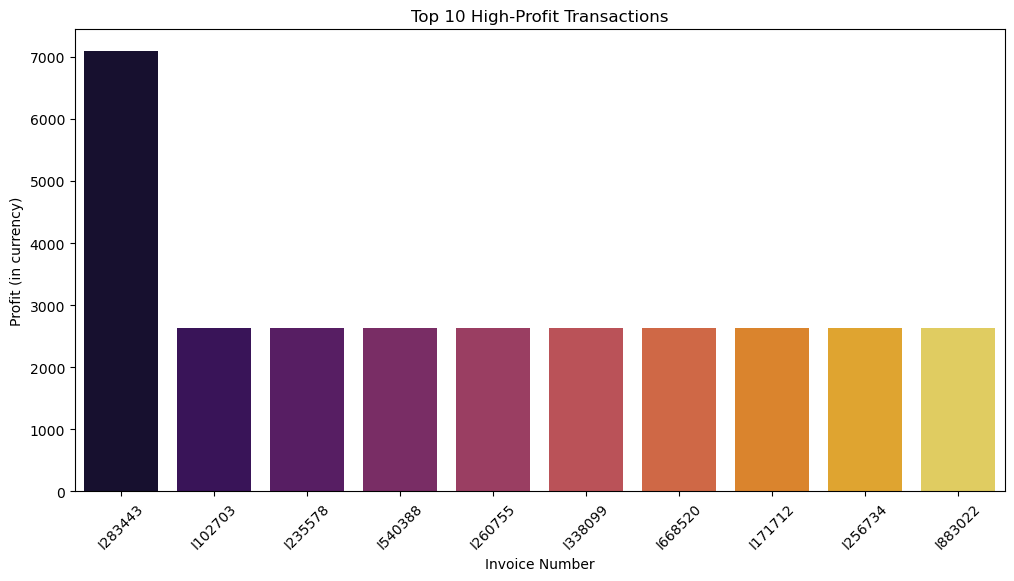

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='invoice_no', y='profit', hue='invoice_no', legend=False, data=top_profit_transactions, palette='inferno')
plt.title('Top 10 High-Profit Transactions')
plt.xlabel('Invoice Number')
plt.ylabel('Profit (in currency)')
plt.xticks(rotation=45)
plt.show()

# Relationship Between Selling Price and Cost Price

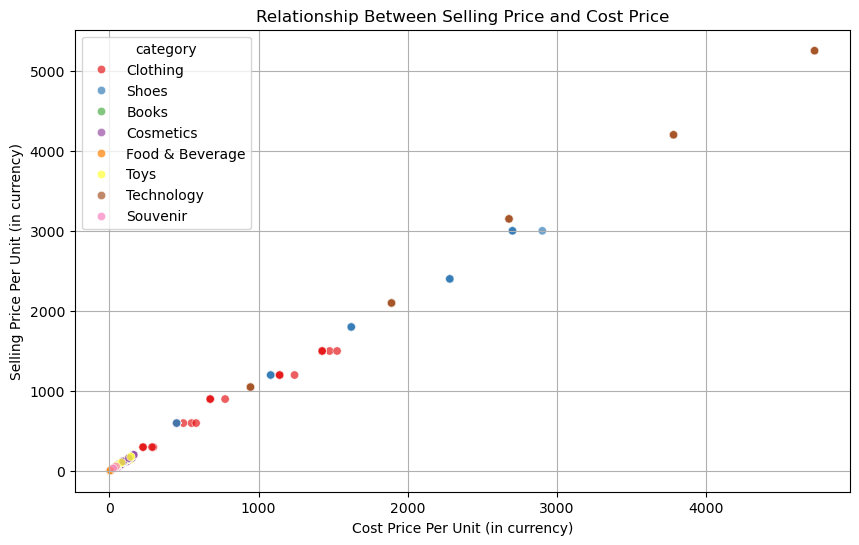

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_price_per_unit', y='selling_price_per_unit', data=df, hue='category', palette='Set1', alpha=0.7)
plt.title('Relationship Between Selling Price and Cost Price')
plt.xlabel('Cost Price Per Unit (in currency)')
plt.ylabel('Selling Price Per Unit (in currency)')
plt.grid(True)
plt.show()

# Top 5 States by Profit

In [50]:
profit_by_state = df.groupby('state')['profit'].sum().sort_values(ascending=False).head(5).reset_index()
profit_by_state

,state,profit
0,California,5091154.307
1,New York,3102229.968
2,Texas,2626595.884
3,Pennsylvania,1599581.776
4,Illinois,1332293.887


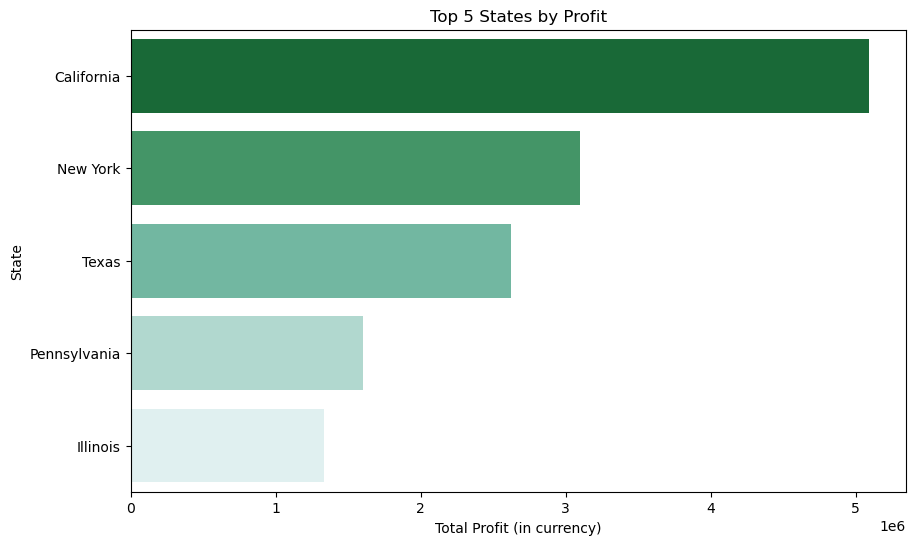

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='state', hue='state', legend=False, data=profit_by_state, palette='BuGn_r')
plt.title('Top 5 States by Profit')
plt.xlabel('Total Profit (in currency)')
plt.ylabel('State')
plt.show()

# Customer lifetime value

In [53]:
cltv = df.groupby('customer_id')['selling_price_per_unit'].sum().reset_index()
cltv

,customer_id,selling_price_per_unit
0,C100004,1500.40
1,C100005,1200.34
2,C100006,107.52
3,C100012,26.15
4,C100019,35.84
...,...,...
99452,C999886,15.69
99453,C999910,45.45
99454,C999974,1500.40
99455,C999976,107.52


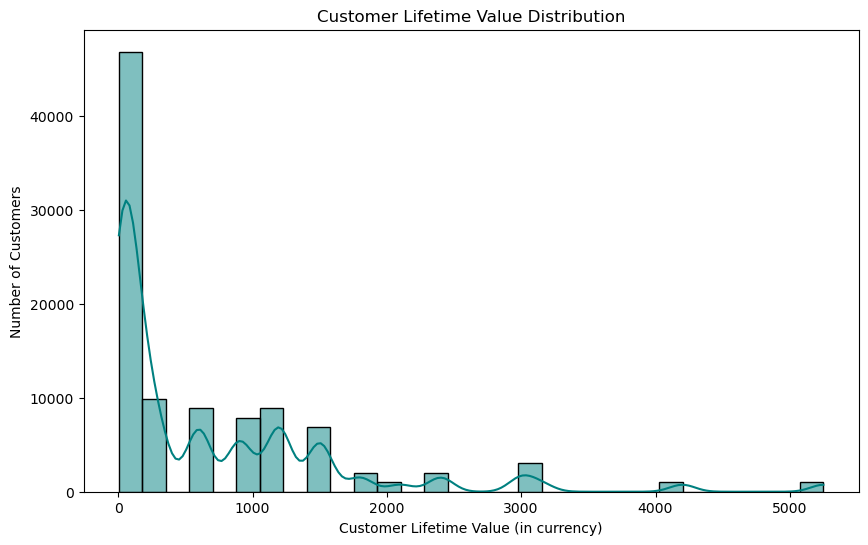

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(cltv['selling_price_per_unit'], bins=30, kde=True, color='teal')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Customer Lifetime Value (in currency)')
plt.ylabel('Number of Customers')
plt.show()

# Repeat Customers vs One-Time Customers

In [56]:
transactions_per_customer = df.groupby('customer_id').size().reset_index(name='transaction_count')
repeat_customers = transactions_per_customer[transactions_per_customer['transaction_count'] > 1].shape[0]
one_time_customers = transactions_per_customer[transactions_per_customer['transaction_count'] == 1].shape[0]

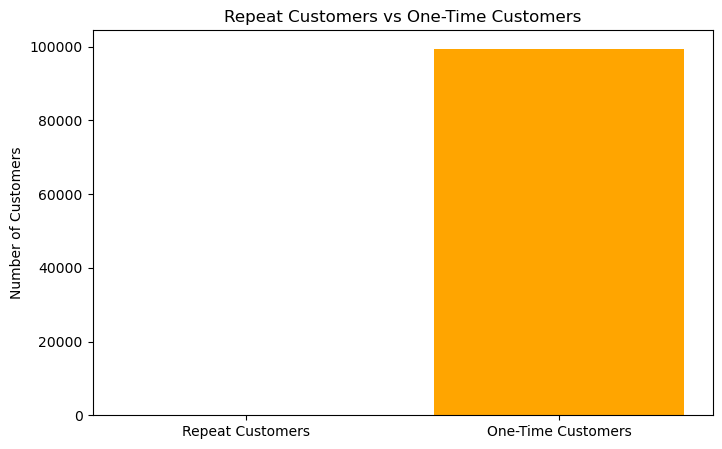

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(['Repeat Customers', 'One-Time Customers'], [repeat_customers, one_time_customers], color=['royalblue', 'orange'])
plt.title('Repeat Customers vs One-Time Customers')
plt.ylabel('Number of Customers')
plt.show()

# Correlation Between Age and Spending

In [59]:
spending_age_correlation = df.groupby('customer_id').agg({'selling_price_per_unit': 'sum', 'age': 'first'}).reset_index()
spending_age_correlation

,customer_id,selling_price_per_unit,age
0,C100004,1500.40,61
1,C100005,1200.34,34
2,C100006,107.52,44
3,C100012,26.15,25
4,C100019,35.84,21
...,...,...,...
99452,C999886,15.69,61
99453,C999910,45.45,41
99454,C999974,1500.40,29
99455,C999976,107.52,49


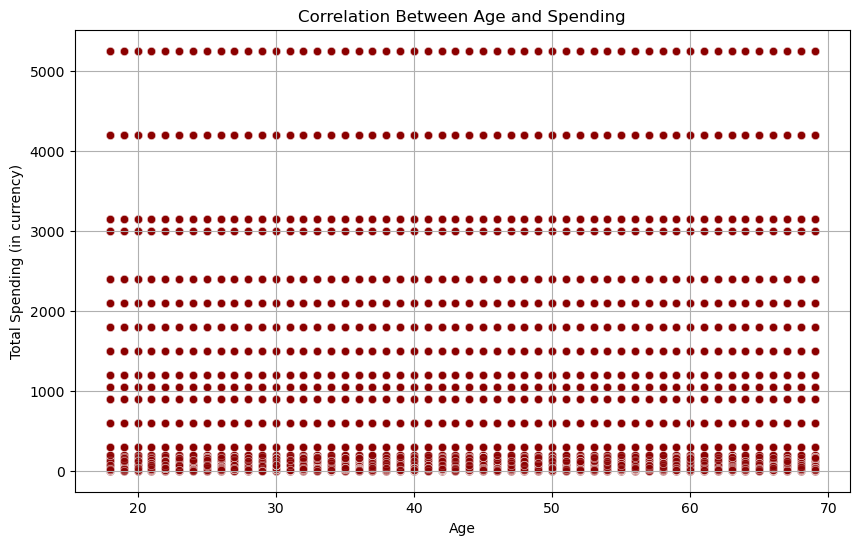

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='selling_price_per_unit', data=spending_age_correlation, color='darkred', alpha=0.6)
plt.title('Correlation Between Age and Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending (in currency)')
plt.grid(True)
plt.show()

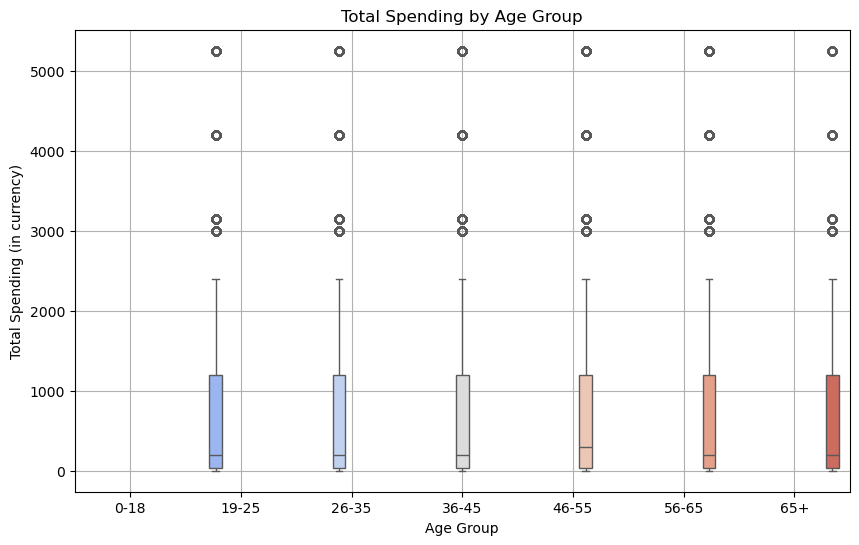

In [61]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
spending_age_correlation['age_group'] = pd.cut(spending_age_correlation['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='selling_price_per_unit',hue ='age_group', legend=False,data=spending_age_correlation, palette='coolwarm')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending (in currency)')
plt.grid(True)
plt.show()


# Time to First Purchase
This insight identifies how long it takes for customers to make their first purchase from the dataset's initial date.

In [63]:
first_purchase = df.groupby('customer_id')['invoice_date'].min().reset_index()
first_purchase['days_to_first_purchase'] = (first_purchase['invoice_date'] - df['invoice_date'].min()).dt.days

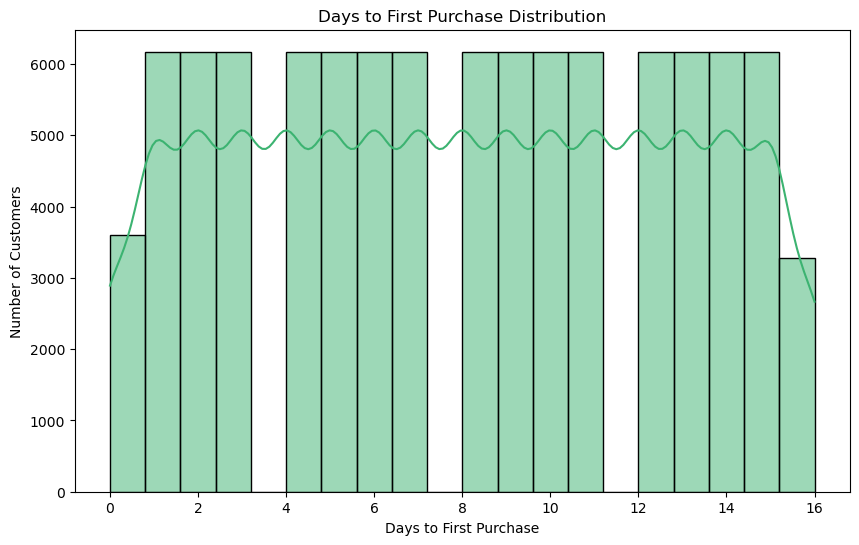

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(first_purchase['days_to_first_purchase'], bins=20, kde=True, color='mediumseagreen')
plt.title('Days to First Purchase Distribution')
plt.xlabel('Days to First Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Basket Size Analysis
Basket size refers to the number of items a customer purchases in a single transaction.

In [66]:
basket_size = df.groupby('invoice_no')['quantity'].sum().reset_index()
basket_size

,invoice_no,quantity
0,I100008,5
1,I100014,5
2,I100015,2
3,I100024,3
4,I100027,4
...,...,...
99452,I999956,4
99453,I999959,4
99454,I999972,2
99455,I999973,1


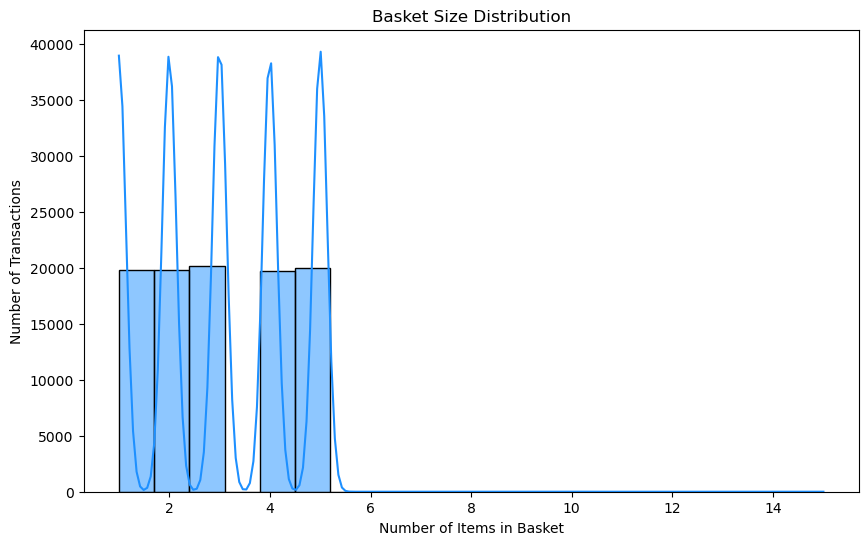

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(basket_size['quantity'], bins=20, kde=True, color='dodgerblue')
plt.title('Basket Size Distribution')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Number of Transactions')
plt.show()

# Seasonality in Sales

In [69]:
df['invoice_month'] = df['invoice_date'].dt.month
monthly_sales = df.groupby('invoice_month')['selling_price_per_unit'].sum().reset_index()

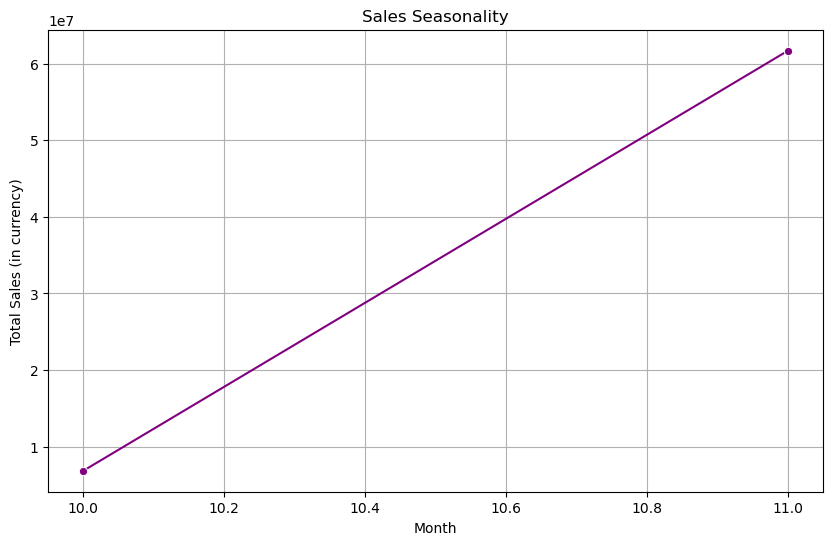

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='invoice_month', y='selling_price_per_unit', data=monthly_sales, marker='o', color='purple')
plt.title('Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Sales (in currency)')
plt.grid(True)
plt.show()

#  Customer Segmentation by Age Group

In [72]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

sales_by_age_group = df.groupby('age_group', observed=True)['selling_price_per_unit'].sum().reset_index()
sales_by_age_group

,age_group,selling_price_per_unit
0,19-25,9160709.69
1,26-35,13089584.64
2,36-45,13584504.96
3,46-55,13206068.93
4,56-65,13010651.30
5,65+,6499846.39


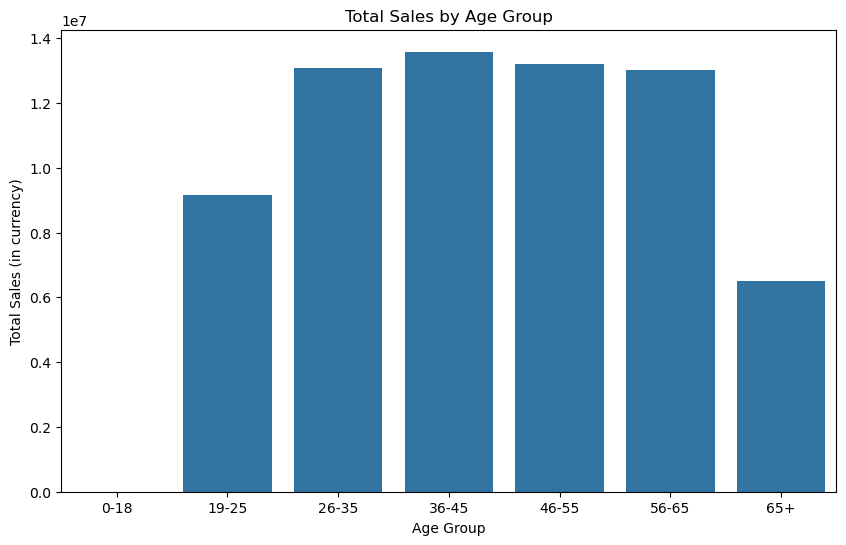

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='selling_price_per_unit', legend=False, data=sales_by_age_group)
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (in currency)')
plt.show()

# Churn Prediction Indicators

In [77]:
last_purchase = df.groupby('customer_id')['invoice_date'].max().reset_index()
last_purchase['days_since_last_purchase'] = (df['invoice_date'].max() - last_purchase['invoice_date']).dt.days

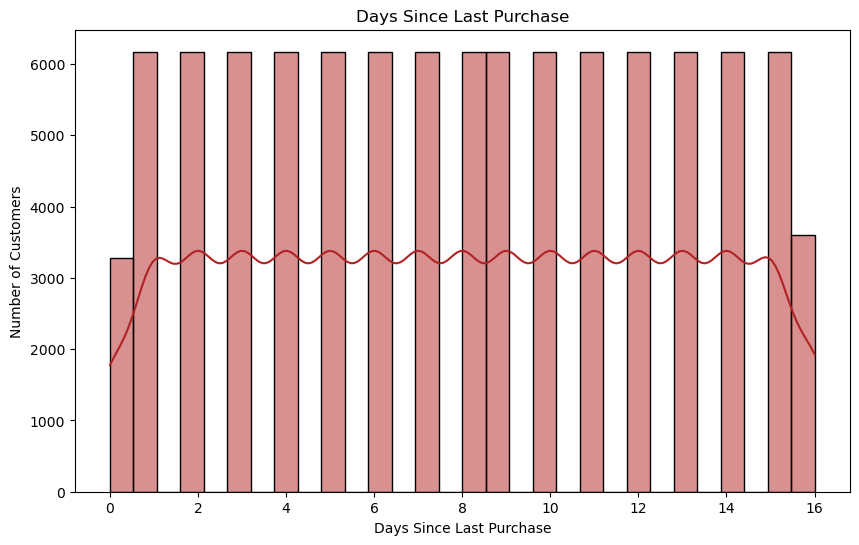

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(last_purchase['days_since_last_purchase'], bins=30, kde=True, color='firebrick')
plt.title('Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()